# **逻辑斯蒂回归（Logistic Regression）**

## **1. 什么是逻辑斯蒂回归？**
逻辑斯蒂回归是一种经典的二分类模型，尽管名字中有“回归”，但它实际上是一种分类算法。逻辑斯蒂回归通过一个非线性函数（Sigmoid 函数）将输入特征映射到概率值，从而实现对样本类别的预测。

逻辑斯蒂回归的核心目标是：
- 输入：特征向量 $ X = [x_1, x_2, \dots, x_n] $。
- 输出：样本属于正类的概率 $ P(y=1|X) $。

---

## **2. 模型假设**

### **(1) 线性组合**
逻辑斯蒂回归首先假设输入特征 $ X $ 和权重向量 $ \theta = [\theta_0, \theta_1, \dots, \theta_n] $ 的线性组合为：
$$
z = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n = \theta^T X
$$
其中：
- $ \theta_0 $ 是偏置项（bias）。
- $ \theta^T X $ 表示权重与特征的点积。

### **(2) Sigmoid 函数**
为了将线性组合的结果 $ z $ 映射到概率值 $ [0, 1] $，逻辑斯蒂回归引入了 Sigmoid 函数：
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$
Sigmoid 函数的性质：
- 当 $ z \to +\infty $，$ \sigma(z) \to 1 $。
- 当 $ z \to -\infty $，$ \sigma(z) \to 0 $。
- $ \sigma(z) $ 的输出始终在 $ [0, 1] $ 范围内。

因此，样本属于正类的概率可以表示为：
$$
P(y=1|X) = \sigma(\theta^T X) = \frac{1}{1 + e^{-\theta^T X}}
$$

样本属于负类的概率为：
$$
P(y=0|X) = 1 - P(y=1|X) = 1 - \sigma(\theta^T X)
$$

---

## **3. 损失函数**

逻辑斯蒂回归的目标是找到一组最优的权重 $ \theta $，使得模型的预测概率尽可能接近真实标签 $ y $。为此，我们定义损失函数为**对数似然损失（Log Loss）**。

对于单个样本 $ (X_i, y_i) $，其损失函数为：
$$
L(\theta) = 
\begin{cases} 
-\log(P(y=1|X)), & \text{if } y = 1 \\
-\log(P(y=0|X)), & \text{if } y = 0
\end{cases}
$$

合并两种情况，可以写成：
$$
L(\theta) = -y \log(P(y=1|X)) - (1-y) \log(1-P(y=1|X))
$$

将所有样本的损失函数加总，得到总体损失函数：
$$
J(\theta) = -\sum_{i=1}^N \left[ y_i \log(P(y_i=1|X_i)) + (1-y_i) \log(1-P(y_i=1|X_i)) \right]
$$

其中：
- $ N $ 是样本总数。
- $ P(y_i=1|X_i) = \sigma(\theta^T X_i) $。

---

## **4. 参数优化**

为了最小化损失函数 $ J(\theta) $，我们需要对权重 $ \theta $ 进行优化。常用的优化方法是梯度下降法。

### **(1) 梯度计算**
对损失函数 $ J(\theta) $ 求导，得到梯度：
$$
\frac{\partial J(\theta)}{\partial \theta} = \sum_{i=1}^N \left[ \sigma(\theta^T X_i) - y_i \right] X_i
$$

解释：
- $ \sigma(\theta^T X_i) - y_i $ 表示预测值与真实值之间的误差。
- $ X_i $ 是误差对应的特征向量。

### **(2) 梯度下降更新规则**
使用梯度下降法更新权重 $ \theta $：
$$
\theta := \theta - \alpha \cdot \frac{\partial J(\theta)}{\partial \theta}
$$
其中：
- $ \alpha $ 是学习率（learning rate），控制每次更新的步长。

---

## **5. 预测**

训练完成后，逻辑斯蒂回归模型可以通过以下步骤进行预测：
1. 计算线性组合：
   $$
   z = \theta^T X
   $$
2. 使用 Sigmoid 函数计算概率：
   $$
   P(y=1|X) = \sigma(z) = \frac{1}{1 + e^{-z}}
   $$
3. 根据阈值（通常为 0.5）判断类别：
   $$
   \hat{y} = 
   \begin{cases} 
   1, & \text{if } P(y=1|X) \geq 0.5 \\
   0, & \text{otherwise}
   \end{cases}
   $$

---

## **6. 总结**

逻辑斯蒂回归的核心思想是：
1. **线性组合**：通过权重 $ \theta $ 将输入特征 $ X $ 映射到一个实数值 $ z $。
2. **非线性变换**：使用 Sigmoid 函数将 $ z $ 映射到概率值 $ [0, 1] $。
3. **优化目标**：通过最小化对数似然损失函数 $ J(\theta) $ 来学习最优的权重 $ \theta $。
4. **预测**：根据概率值判断样本类别。

逻辑斯蒂回归的优点：
- 简单高效，易于实现。
- 输出具有概率解释，便于分析和决策。

逻辑斯蒂回归的局限性：
- 假设数据是线性可分的，无法处理复杂的非线性关系。
- 对异常值敏感。

---

数据集的大小:  1000


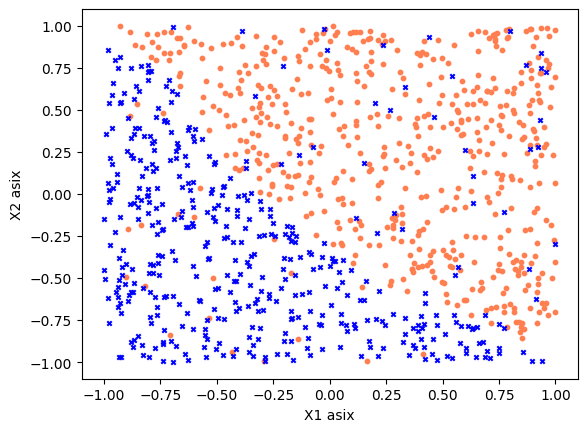

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
lines=np.loadtxt('lr_dataset.csv',delimiter=',',dtype=float)
x_total=lines[:,0:2]
y_total=lines[:,2]
print("数据集的大小: ",len(x_total))

#我们来看看绘制的图像
pos_index=np.where(y_total==1)
neg_index=np.where(y_total==0)
#图像展示
plt.scatter(x_total[pos_index,0],x_total[pos_index,1],marker='o',color='coral',s=10)
plt.scatter(x_total[neg_index,0],x_total[neg_index,1],marker='x',color='blue',s=10)
plt.xlabel('X1 asix')
plt.ylabel('X2 asix')
plt.show()


#划分数据集
np.random.seed(0)
ratio=0.7
split=int(ratio*len(x_total))   #【注意】这里要转变为整数
idx=np.random.permutation(len(x_total))

x_total=x_total[idx]
y_total=y_total[idx]

x_train,x_test=x_total[:split],x_total[split:]
y_train,y_test=y_total[:split],y_total[split:]


我们来介绍一下函数

`np.cumsum()` 它对数组中的每个元素依次进行累加，并返回一个与原数组形状相同的数组。

举个例子

In [3]:
import numpy as np

arr = np.array([1, 2, 3, 4, 5])
result = np.cumsum(arr)
print(result)
arr = np.array([[1, 2, 3], [4, 5, 6]])  #不指定 axis（默认展平为一维数组）
result = np.cumsum(arr)
print(result)

[ 1  3  6 10 15]
[ 1  3  6 10 15 21]


接下来我们来介绍一下ROC曲线

ROC（Receiver Operating Characteristic）曲线是一种用于评估分类模型性能的工具，尤其是在二分类问题中。它通过绘制**真正例率（True Positive Rate, TPR）**与**假正例率（False Positive Rate, FPR）**之间的关系来展示模型在不同分类阈值下的表现。

- **TPR（True Positive Rate 真阳性率）**：表示实际为正类的样本中被正确预测为正类的比例。
  $$
  TPR = \frac{TP}{TP + FN}
  $$
- **FPR（False Positive Rate，假阳性率）**：表示实际为负类的样本中被错误预测为正类的比例。
  $$
  FPR = \frac{FP}{FP + TN}
  $$

### ROC曲线的构建
1. **逻辑回归输出概率**：逻辑回归模型会为每个样本输出一个介于0和1之间的概率值，表示该样本属于正类的可能性。
2. **设定阈值**：通过调整不同的阈值（如0.1、0.5、0.9等），将概率值转换为类别标签（正类或负类）。
3. **计算TPR和FPR**：对于每个阈值，计算对应的TPR和FPR。
4. **绘制曲线**：以FPR为横轴，TPR为纵轴，绘制出ROC曲线。

### ROC曲线的特点
- **对角线（随机猜测线）**：如果模型的表现接近随机猜测，则ROC曲线会接近对角线（即y=x）。
- **理想模型**：理想的分类模型的ROC曲线会尽量靠近左上角，表示高TPR和低FPR。
- **AUC（Area Under Curve）**：ROC曲线下的面积称为AUC，用于量化模型的整体性能：
  - AUC = 1：完美分类器。
  - AUC = 0.5：随机分类器。
  - AUC越接近1，模型性能越好。

### ROC曲线的应用场景
1. **模型比较**：通过比较不同模型的ROC曲线及其AUC值，选择性能更优的模型。
2. **阈值选择**：根据ROC曲线确定最优分类阈值，平衡TPR和FPR。
3. **不平衡数据集**：在正负样本比例严重失衡的情况下，ROC曲线比单纯依赖准确率更能反映模型的真实性能。

在计算 ROC 曲线和 AUC 时，代码中并没有显式地提供阈值，而是直接基于排序后的预测概率计算了 TPR 和 FPR。

这是因为 ROC 曲线和 AUC 的计算方式本质上是基于所有可能的阈值进行的。

ROC 曲线的核心思想是遍历所有可能的阈值 ，并计算每个阈值下的 TPR 和 FPR。

换句话说，ROC 曲线并不是基于单一阈值计算的，而是综合了所有可能的阈值。

【AUC衡量的是正类样本排在负类样本前面的概率】

意思就是说他前几个数字，就代表阈值取到当前值

In [4]:
#准确率
def acc(y_true,y_pred):
  return np.mean(y_true==y_pred)
#ROC 曲线下面积 
def auc(y_true,y_pred):
  #按照预测值从大到小排列，越靠前的样本预测阳的概率最大
  idx=np.argsort(y_pred)[::-1]
  y_true=y_true[idx]
  y_pred=y_pred[idx] 
  # 把y_pred中不重复的值当作阈值，依次计算FP样本和TP样本数量
  # 由于两个数组已经排序且位置对应，直接从前向后累加即可

  #得到每个位置之前的正类样本数   也就是说以当前的预测率当作阈值
  tp=np.cumsum(y_true)
  #得到每个位置之前的负类样本数
  fp=np.cumsum(1-y_true)
  #计算 True Positive Rate（TPR），即召回率（Recall） TPR=(TP)/(TP+FN)
  tpr = tp / tp[-1]
  #计算 False Positive Rate（FPR），即误报率。 FPR=(FP)/(FP+TN)
  fpr = fp / fp[-1]
  s=0.0
  #开头被插入一个0
  #ROC 曲线的起点是 (0, 0)，表示在没有任何正类样本被预测为正类时，TPR 和 FPR 都为 0。 
  tpr=np.concatenate([[0],tpr])
  fpr=np.concatenate([[0],fpr])
  #梯形面积法
  for i in range(1,len(fpr)):
    s+=(fpr[i]-fpr[i-1])*tpr[i]
  return s

如果你还不理解ROC曲线，我们可以看一个示例

#### 示例数据

假设我们有一个二分类问题，数据如下：

| 样本 | 特征X | 真实标签Y | 模型预测概率 |
|------|-------|-----------|--------------|
| 1    | 2.5   | 1         | 0.9          |
| 2    | 1.8   | 1         | 0.8          |
| 3    | 0.5   | 0         | 0.3          |
| 4    | 0.2   | 0         | 0.1          |

在这个例子中：
- **正类样本（Y=1）**的概率值为0.9和0.8。
- **负类样本（Y=0）**的概率值为0.3和0.1。
- 正类样本的概率始终高于负类样本的概率。

---

#### 计算TPR和FPR

我们按照不同的阈值计算TPR和FPR：

| 阈值 | 预测结果       | TP | FN | FP | TN | TPR  | FPR  |
|------|----------------|----|----|----|----|------|------|
| 0.9  | [1]            | 1  | 1  | 0  | 2  | 0.5  | 0.0  |
| 0.8  | [1, 1]         | 2  | 0  | 0  | 2  | 1.0  | 0.0  |
| 0.3  | [1, 1, 0]      | 2  | 0  | 1  | 1  | 1.0  | 0.5  |
| 0.1  | [1, 1, 0, 0]   | 2  | 0  | 2  | 0  | 1.0  | 1.0  |



#### 绘制ROC曲线

| 阈值 | TPR  | FPR  |
|------|------|------|
| 0.9  | 0.5  | 0.0  |
| 0.8  | 1.0  | 0.0  |
| 0.3  | 1.0  | 0.5  |
| 0.1  | 1.0  | 1.0  |

这些点在ROC曲线中表示为：
- (0.0, 0.0)：初始状态（阈值接近1时，所有样本都被预测为负类）。
- (0.5, 0.0)：阈值为0.9时的结果。
- (1.0, 0.0)：阈值为0.8时的结果。
- (1.0, 0.5)：阈值为0.3时的结果。
- (1.0, 1.0)：阈值接近0时的结果（所有样本都被预测为正类）。

曲线描述如下：
- ROC曲线从(0.0, 0.0)开始，依次经过(0.5, 0.0)、(1.0, 0.0)、(1.0, 0.5)，最后到达(1.0, 1.0)。
- 曲线紧贴坐标轴，形成一个阶梯状的形状，反映了模型在不同阈值下的表现。
- 这种形状表明模型能够完美地区分正类和负类样本，最终AUC=1。



介绍一个函数

`np.linalg.norm(theta,ord=2)`

计算 theta 的范数（Norm） 默认计算 L2 范数：

`**2` 求平方

In [5]:
#逻辑斯蒂函数
def logistic(z):
  return 1/(1+np.exp(-z))
def GD(num_steps,learing_rate,l2_coef):
  #初始化参数模型
  theta=np.random.normal(size=(X.shape[1],))
  train_losses=[]
  test_losses=[]
  train_acc=[]
  test_acc=[]
  train_auc=[]
  test_auc=[]
  for i in range(num_steps):
    pred=logistic( X @ theta)
    grad=-X.T@(y_train-pred)+l2_coef*theta
    theta-=learing_rate*grad
    #记录一下损失函数
    train_loss=-y_train.T@ np.log(pred)-(1-y_train).T @ np.log(1-pred)+l2_coef*np.linalg.norm(theta)**2/2
    train_losses.append(train_loss/len(X))
    test_pred = logistic(X_test @ theta)
    test_loss = - y_test.T @ np.log(test_pred) - (1 - y_test).T @ np.log(1 - test_pred)
    test_losses.append(test_loss / len(X_test))
    #记录各项评价指标，阈值采用0.5
    train_acc.append(acc(y_train,pred>=0.5))
    test_acc.append(acc(y_test, test_pred >= 0.5))
    train_auc.append(auc(y_train, pred))
    test_auc.append(auc(y_test, test_pred))
  return theta, train_losses, test_losses,train_acc, test_acc, train_auc, test_auc

预测准确率： 0.8766666666666667
回归系数： [3.13501827 2.90998799 0.55095127]


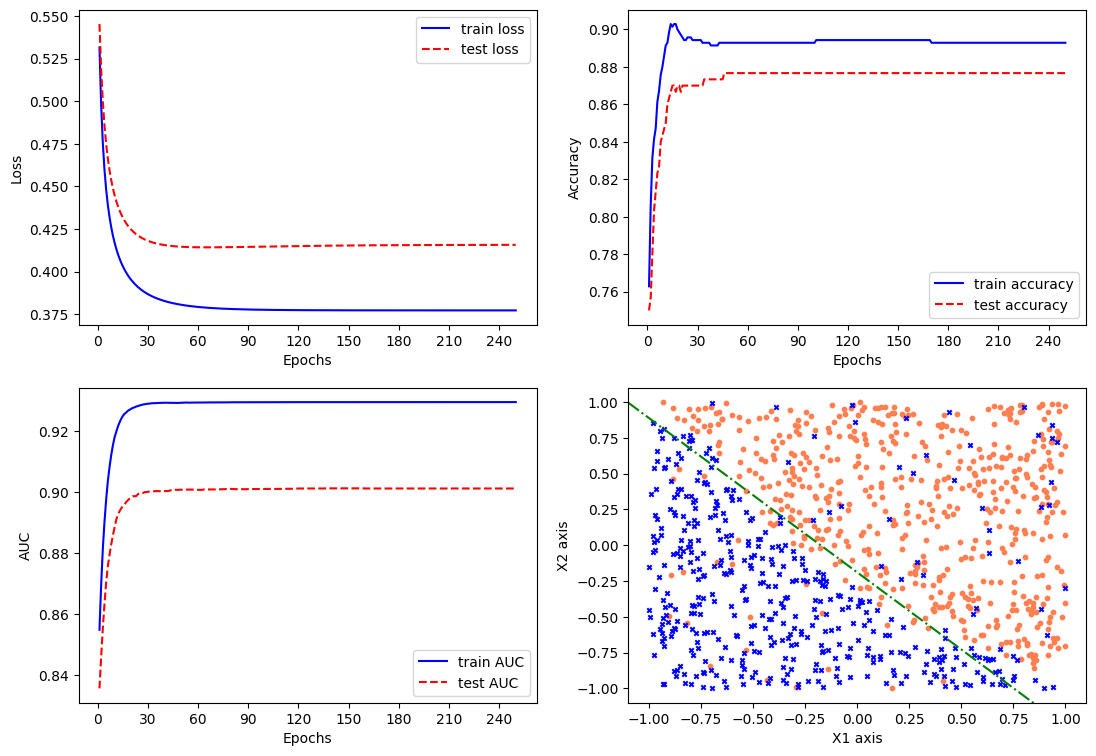

In [6]:
# 定义梯度下降迭代的次数，学习率，以及L2正则系数
num_steps = 250
learning_rate = 0.002
l2_coef = 1.0
np.random.seed(0)

# 在x矩阵上拼接1
X = np.concatenate([x_train, np.ones((x_train.shape[0], 1))], axis=1)
X_test = np.concatenate([x_test, np.ones((x_test.shape[0], 1))], axis=1) 

theta, train_losses, test_losses, train_acc, test_acc, \
    train_auc, test_auc = GD(num_steps, learning_rate, l2_coef)

# 计算测试集上的预测准确率
#1 和 0 是条件判断的结果值，分别表示满足条件和不满足条件时的输出。
y_pred = np.where(logistic(X_test @ theta) >= 0.5, 1, 0)
final_acc = acc(y_test, y_pred)
print('预测准确率：', final_acc)
print('回归系数：', theta)

plt.figure(figsize=(13, 9))
xticks = np.arange(num_steps) + 1
# 绘制训练曲线
plt.subplot(221)
plt.plot(xticks, train_losses, color='blue', label='train loss')
plt.plot(xticks, test_losses, color='red', ls='--', label='test loss')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 绘制准确率
plt.subplot(222)
plt.plot(xticks, train_acc, color='blue', label='train accuracy')
plt.plot(xticks, test_acc, color='red', ls='--', label='test accuracy')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 绘制AUC
plt.subplot(223)
plt.plot(xticks, train_auc, color='blue', label='train AUC')
plt.plot(xticks, test_auc, color='red', ls='--', label='test AUC')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()

# 绘制模型学到的分隔直线
plt.subplot(224)
plot_x = np.linspace(-1.1, 1.1, 100)
# 直线方程：theta_0 * x_1 + theta_1 * x_2 + theta_2 = 0
plot_y = -(theta[0] * plot_x + theta[2]) / theta[1]
pos_index = np.where(y_total == 1)
neg_index = np.where(y_total == 0)
plt.scatter(x_total[pos_index, 0], x_total[pos_index, 1], 
    marker='o', color='coral', s=10)
plt.scatter(x_total[neg_index, 0], x_total[neg_index, 1], 
    marker='x', color='blue', s=10)
plt.plot(plot_x, plot_y, ls='-.', color='green')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('X1 axis')
plt.ylabel('X2 axis')
plt.savefig('output_16_1.png')
plt.savefig('output_16_1.pdf')
plt.show()

哈哈哈 终于完成的动手写的部分

让我们来看看sklearn提供的封装好的库

In [9]:
from sklearn.linear_model import LogisticRegression
# 使用线性模型中的逻辑回归模型在数据集上训练
# 其提供的liblinear优化算法适合在较小数据集上使用
# 默认使用系数为1.0的L2正则化约束
# 其他可选参数请参考官方文档
lr_clf=LogisticRegression(solver='liblinear')
lr_clf.fit(x_train,y_train)
print('回归系数: ',lr_clf.coef_[0],lr_clf.intercept_)

y_pred=lr_clf.predict(x_test)
print('精确率为： ',np.mean(y_pred==y_test))

回归系数:  [3.14129907 2.91620111] [0.5518978]
精确率为：  0.8766666666666667


好的，让我来愉快的介绍这章的学习